<a href="https://colab.research.google.com/github/SitiFadilahNurkhotimah/Kelompok_9_2024C_PROJEK_AKHIR_DATA_WRANGLING/blob/main/9_Laili%20Nurrohmatul%20Fadhila%20Zulfa_Siti%20Fadilah%20Nurkhotimah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJEK AKHIR DATA WRANGLING 2025/2026**

**PROJEK AKHIR DATA WRANGLING**

KELOMPOK 9 - 2024 C

Anggota Kelompok:

- Siti Fadilah Nurkhotimah (1314623019 - UNJ / 251155009 - UNESA)
- Laili Nurrohmatul Fadhila Zulfa			(24031554093- UNESA)

---



Judul:

**Analisis Pengaruh Faktor Iklim dan Kepadatan Penduduk terhadap Kasus Demam Berdarah Dengue (DBD) Menurut Provinsi di Indonesia Tahun 2019–2021**

# **Dataset Iklim**

Sumber Data: Kaggle - https://www.kaggle.com/datasets/greegtitan/indonesia-climate

Keterangan:

Tn = Suhu minimum (°C)

Tx = Suhu maksimum (°C)

Tavg = Suhu rata-rata (°C)

RH_avg = kelembaban rata-rata (%)

RR = curah hujan (mm)

ss = durasi sinar matahari (jam)

ff_x = kecepatan angin maksimum (m/s)

ddd_x = arah angin pada kecepatan maksimum (°)

ff_avg = kecepatan angin rata-rata (m/s)

ddd_car = arah angin dominan (°)

## **PENGAMBILAN DATA**

In [1]:
import pandas as pd

# === LOAD DATA ===
df_iklim = pd.read_csv("climate_data.csv")
df_station = pd.read_csv("station_detail.csv")
df_prov = pd.read_csv("province_detail.csv")

> province_detail.csv

In [2]:
df_prov

,province_id,province_name
0,1,Nanggroe Aceh Darussalam
1,2,Sumatera Utara
2,3,Sumatera Barat
3,4,Riau
4,5,Jambi
5,6,Sumatera Selatan
6,7,Bengkulu
7,8,Lampung
8,9,Kep. Bangka Belitung
9,10,Kep. Riau


## INTEGRASI DATA

Integrasi (menyamakan format nama provinsi)

In [3]:
# sesuaiin kolom Provinsi
df_prov["province_name"] = df_prov["province_name"].str.title()

df_prov["province_name"] = df_prov["province_name"].replace({"Nanggroe Aceh Darussalam": "Aceh", "Dki Jakarta" : 'DKI Jakarta', 'Di Yogyakarta' : 'DI Yogyakarta'})
df_prov['province_name']

,province_name
0,Aceh
1,Sumatera Utara
2,Sumatera Barat
3,Riau
4,Jambi
5,Sumatera Selatan
6,Bengkulu
7,Lampung
8,Kep. Bangka Belitung
9,Kep. Riau


In [4]:
df_prov

,province_id,province_name
0,1,Aceh
1,2,Sumatera Utara
2,3,Sumatera Barat
3,4,Riau
4,5,Jambi
5,6,Sumatera Selatan
6,7,Bengkulu
7,8,Lampung
8,9,Kep. Bangka Belitung
9,10,Kep. Riau


> climate_data.csv

In [5]:
df_iklim

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
589260,27-12-2020,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980
589261,28-12-2020,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980
589262,29-12-2020,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980
589263,30-12-2020,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980


In [6]:
df_iklim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        589265 non-null  object 
 1   Tn          565882 non-null  float64
 2   Tx          551529 non-null  float64
 3   Tavg        544160 non-null  float64
 4   RH_avg      541083 non-null  float64
 5   RR          463881 non-null  float64
 6   ss          545544 non-null  float64
 7   ff_x        579051 non-null  float64
 8   ddd_x       576137 non-null  float64
 9   ff_avg      579138 non-null  float64
 10  ddd_car     575526 non-null  object 
 11  station_id  589265 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 53.9+ MB


In [7]:
df_iklim['station_id'].unique()[:20]

array([96001, 96009, 96011, 96015, 96017, 96031, 96033, 96035, 96037,
       96039, 96041, 96043, 96071, 96073, 96075, 96077, 96087, 96089,
       96091, 96107])

In [8]:
df_iklim.loc[:, 'station_id'] = df_iklim['station_id'].astype(int)

Integrasi (menggabung dataset iklim dengan dataset stasiun)

In [9]:
# MERGE climate_data.csv (df_iklim) + station_detail.csv (df_station)
df_merge1 = df_iklim.merge(df_station[['station_id', 'province_id']], on='station_id', how='left')
df_merge1

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,province_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,1
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,1
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,1
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,1
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589260,27-12-2020,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980,32
589261,28-12-2020,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980,32
589262,29-12-2020,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980,32
589263,30-12-2020,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980,32


Integrasi (Menggabung dataset dari gabungan iklim dan stasiun dengan dataset provinsi)

In [10]:
# MERGE dengan province_detail.csv (df_prov)
df_final = df_merge1.merge(df_prov, on='province_id', how='left')
df_final

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,province_id,province_name
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,1,Aceh
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,1,Aceh
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,1,Aceh
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,1,Aceh
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,1,Aceh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589260,27-12-2020,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980,32,Papua
589261,28-12-2020,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980,32,Papua
589262,29-12-2020,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980,32,Papua
589263,30-12-2020,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980,32,Papua


In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           589265 non-null  object 
 1   Tn             565882 non-null  float64
 2   Tx             551529 non-null  float64
 3   Tavg           544160 non-null  float64
 4   RH_avg         541083 non-null  float64
 5   RR             463881 non-null  float64
 6   ss             545544 non-null  float64
 7   ff_x           579051 non-null  float64
 8   ddd_x          576137 non-null  float64
 9   ff_avg         579138 non-null  float64
 10  ddd_car        575526 non-null  object 
 11  station_id     589265 non-null  int64  
 12  province_id    589265 non-null  int64  
 13  province_name  589265 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 62.9+ MB


In [12]:
# Save data gabungan iklim dan provinsi
df_final.to_csv("iklim_per_Provinsi 2019-2020 2.csv", index=False)

In [13]:
#Standarisasi format datetime
df_final['date'] = pd.to_datetime(df_final['date'], format='%d-%m-%Y', errors='coerce')
df_final

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,province_id,province_name
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,1,Aceh
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,1,Aceh
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,1,Aceh
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,1,Aceh
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,1,Aceh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589260,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980,32,Papua
589261,2020-12-28,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980,32,Papua
589262,2020-12-29,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980,32,Papua
589263,2020-12-30,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980,32,Papua


In [14]:
df_final['year'] = df_final['date'].dt.year
df_final

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,province_id,province_name,year
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,1,Aceh,2010
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,1,Aceh,2010
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,1,Aceh,2010
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,1,Aceh,2010
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,1,Aceh,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589260,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980,32,Papua,2020
589261,2020-12-28,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980,32,Papua,2020
589262,2020-12-29,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980,32,Papua,2020
589263,2020-12-30,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980,32,Papua,2020


In [15]:
#Memfilter tahun 2019-2020
df_final = df_final[df_final['year'].isin([2019, 2020])].copy()
df_final

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,province_id,province_name,year
3182,2019-01-01,23.2,30.6,26.5,86.0,NaN,8.5,4.0,110.0,2.0,E,96001,1,Aceh,2019
3183,2019-01-02,23.6,30.6,27.3,84.0,NaN,9.0,5.0,100.0,2.0,C,96001,1,Aceh,2019
3184,2019-01-03,24.8,30.8,28.0,77.0,NaN,6.5,4.0,70.0,2.0,E,96001,1,Aceh,2019
3185,2019-01-04,25.4,30.4,27.3,78.0,NaN,7.5,4.0,90.0,1.0,C,96001,1,Aceh,2019
3186,2019-01-05,23.8,31.6,26.7,80.0,NaN,8.0,4.0,250.0,1.0,C,96001,1,Aceh,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589260,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980,32,Papua,2020
589261,2020-12-28,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980,32,Papua,2020
589262,2020-12-29,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980,32,Papua,2020
589263,2020-12-30,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980,32,Papua,2020




## CLEANING DATA

In [16]:
#penggantian nama kolom
df_final = df_final.rename(columns={'province_name': 'provinsi', 'year' : "tahun"})
df_final

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,province_id,provinsi,tahun
3182,2019-01-01,23.2,30.6,26.5,86.0,NaN,8.5,4.0,110.0,2.0,E,96001,1,Aceh,2019
3183,2019-01-02,23.6,30.6,27.3,84.0,NaN,9.0,5.0,100.0,2.0,C,96001,1,Aceh,2019
3184,2019-01-03,24.8,30.8,28.0,77.0,NaN,6.5,4.0,70.0,2.0,E,96001,1,Aceh,2019
3185,2019-01-04,25.4,30.4,27.3,78.0,NaN,7.5,4.0,90.0,1.0,C,96001,1,Aceh,2019
3186,2019-01-05,23.8,31.6,26.7,80.0,NaN,8.0,4.0,250.0,1.0,C,96001,1,Aceh,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589260,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980,32,Papua,2020
589261,2020-12-28,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980,32,Papua,2020
589262,2020-12-29,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980,32,Papua,2020
589263,2020-12-30,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980,32,Papua,2020


In [17]:
#Mengubah NaN menjadi angka 0
df_final = df_final.fillna(0)
df_final

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,province_id,provinsi,tahun
3182,2019-01-01,23.2,30.6,26.5,86.0,0.0,8.5,4.0,110.0,2.0,E,96001,1,Aceh,2019
3183,2019-01-02,23.6,30.6,27.3,84.0,0.0,9.0,5.0,100.0,2.0,C,96001,1,Aceh,2019
3184,2019-01-03,24.8,30.8,28.0,77.0,0.0,6.5,4.0,70.0,2.0,E,96001,1,Aceh,2019
3185,2019-01-04,25.4,30.4,27.3,78.0,0.0,7.5,4.0,90.0,1.0,C,96001,1,Aceh,2019
3186,2019-01-05,23.8,31.6,26.7,80.0,0.0,8.0,4.0,250.0,1.0,C,96001,1,Aceh,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589260,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980,32,Papua,2020
589261,2020-12-28,25.3,31.6,28.1,78.0,0.0,3.0,12.0,260.0,2.0,C,97980,32,Papua,2020
589262,2020-12-29,24.6,32.3,28.4,81.0,0.0,6.5,5.0,260.0,2.0,SW,97980,32,Papua,2020
589263,2020-12-30,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980,32,Papua,2020


# **Dataset Kepadatan Penduduk**

Sumber Data: Badan Pusat Statistik (BPS) - https://www.bps.go.id/id/statistics-table/2/MTQxIzI=/population-density-by-province.html

## **PENGAMBILAN DATA**

In [18]:
import pandas as pd

df19 = pd.read_csv("Kepadatan Penduduk menurut Provinsi, 2019.csv")
df20 = pd.read_csv("Kepadatan Penduduk menurut Provinsi, 2020.csv")

KEPADATAN PENDUDUK 2019

In [19]:
df19

,38 Provinsi,Unnamed: 1
0,NaN,Kepadatan Penduduk menurut Provinsi (jiwa/km2)
1,NaN,2019
2,ACEH,93
3,SUMATERA UTARA,200
4,SUMATERA BARAT,130
5,RIAU,80
6,JAMBI,72
7,SUMATERA SELATAN,92
8,BENGKULU,100
9,LAMPUNG,244


KEPADATAN - PENDUDUK 2020

In [20]:
df20

,38 Provinsi,Unnamed: 1
0,NaN,Kepadatan Penduduk menurut Provinsi (jiwa/km2)
1,NaN,2020
2,ACEH,91
3,SUMATERA UTARA,203
4,SUMATERA BARAT,132
5,RIAU,73
6,JAMBI,71
7,SUMATERA SELATAN,92
8,BENGKULU,101
9,LAMPUNG,260


## CLEANING DATA

### cleaning data 2019

In [21]:
#Standarisasi Nama kolom
df19 = df19.rename(columns={
    'Unnamed: 1': 'kepadatan 2019',
    '38 Provinsi' : 'provinsi'
})
df19

,provinsi,kepadatan 2019
0,NaN,Kepadatan Penduduk menurut Provinsi (jiwa/km2)
1,NaN,2019
2,ACEH,93
3,SUMATERA UTARA,200
4,SUMATERA BARAT,130
5,RIAU,80
6,JAMBI,72
7,SUMATERA SELATAN,92
8,BENGKULU,100
9,LAMPUNG,244


In [22]:
# drop 2 baris NaN di atas
df19_1= df19.iloc[2:].reset_index(drop=True)

In [23]:
df19_1

,provinsi,kepadatan 2019
0,ACEH,93
1,SUMATERA UTARA,200
2,SUMATERA BARAT,130
3,RIAU,80
4,JAMBI,72
5,SUMATERA SELATAN,92
6,BENGKULU,100
7,LAMPUNG,244
8,KEP. BANGKA BELITUNG,91
9,KEP. RIAU,267


In [24]:
# Mengubah tipe kolom menjadi numerik
df19_1['kepadatan 2019'] = pd.to_numeric(df19_1['kepadatan 2019'], errors='coerce')

In [25]:
# hapus baris kosong
df19 = df19_1.dropna(subset=['provinsi', 'kepadatan 2019'])
df19

,provinsi,kepadatan 2019
0,ACEH,93.0
1,SUMATERA UTARA,200.0
2,SUMATERA BARAT,130.0
3,RIAU,80.0
4,JAMBI,72.0
5,SUMATERA SELATAN,92.0
6,BENGKULU,100.0
7,LAMPUNG,244.0
8,KEP. BANGKA BELITUNG,91.0
9,KEP. RIAU,267.0


In [26]:
df19 = df19[df19['provinsi'] != 'INDONESIA'].copy()
df19

,provinsi,kepadatan 2019
0,ACEH,93.0
1,SUMATERA UTARA,200.0
2,SUMATERA BARAT,130.0
3,RIAU,80.0
4,JAMBI,72.0
5,SUMATERA SELATAN,92.0
6,BENGKULU,100.0
7,LAMPUNG,244.0
8,KEP. BANGKA BELITUNG,91.0
9,KEP. RIAU,267.0


### cleaning data 2020

In [27]:
# drop 2 baris NaN di atas
df20_1= df20.iloc[2:].reset_index(drop=True)
df20_1

,38 Provinsi,Unnamed: 1
0,ACEH,91
1,SUMATERA UTARA,203
2,SUMATERA BARAT,132
3,RIAU,73
4,JAMBI,71
5,SUMATERA SELATAN,92
6,BENGKULU,101
7,LAMPUNG,260
8,KEP. BANGKA BELITUNG,89
9,KEP. RIAU,252


In [28]:
# rename kolom
df20_1 = df20_1.rename(columns={
    'Unnamed: 1': 'kepadatan 2020',
    '38 Provinsi': 'provinsi'})
df20_1

,provinsi,kepadatan 2020
0,ACEH,91
1,SUMATERA UTARA,203
2,SUMATERA BARAT,132
3,RIAU,73
4,JAMBI,71
5,SUMATERA SELATAN,92
6,BENGKULU,101
7,LAMPUNG,260
8,KEP. BANGKA BELITUNG,89
9,KEP. RIAU,252


In [29]:
# Mengubah tipe kolom menjadi numerik
df20_1['kepadatan 2020'] = pd.to_numeric(df20_1['kepadatan 2020'], errors='coerce')

In [30]:
# Menghapus baris kosong
df20 = df20_1.dropna(subset=['provinsi', 'kepadatan 2020'])
df20

,provinsi,kepadatan 2020
0,ACEH,91.0
1,SUMATERA UTARA,203.0
2,SUMATERA BARAT,132.0
3,RIAU,73.0
4,JAMBI,71.0
5,SUMATERA SELATAN,92.0
6,BENGKULU,101.0
7,LAMPUNG,260.0
8,KEP. BANGKA BELITUNG,89.0
9,KEP. RIAU,252.0


## INTEGRASI DATA

In [31]:
# Menggabungkan dataset 2019 dan 2020
df_fix = df19.merge(df20, on='provinsi', how='inner')
df_fix

,provinsi,kepadatan 2019,kepadatan 2020
0,ACEH,93.0,91.0
1,SUMATERA UTARA,200.0,203.0
2,SUMATERA BARAT,130.0,132.0
3,RIAU,80.0,73.0
4,JAMBI,72.0,71.0
5,SUMATERA SELATAN,92.0,92.0
6,BENGKULU,100.0,101.0
7,LAMPUNG,244.0,260.0
8,KEP. BANGKA BELITUNG,91.0,89.0
9,KEP. RIAU,267.0,252.0


In [32]:
# Mengubah nama kolom menjadi title
df_fix['provinsi'] = df_fix['provinsi'].str.title()
df_fix

,provinsi,kepadatan 2019,kepadatan 2020
0,Aceh,93.0,91.0
1,Sumatera Utara,200.0,203.0
2,Sumatera Barat,130.0,132.0
3,Riau,80.0,73.0
4,Jambi,72.0,71.0
5,Sumatera Selatan,92.0,92.0
6,Bengkulu,100.0,101.0
7,Lampung,244.0,260.0
8,Kep. Bangka Belitung,91.0,89.0
9,Kep. Riau,267.0,252.0


In [33]:
# Standarisasi nama provinsi
df_fix['provinsi']= df_fix["provinsi"].replace({"Dki Jakarta": "DKI Jakarta", 'Di Yogyakarta' : 'DI Yogyakarta'})
df_fix

,provinsi,kepadatan 2019,kepadatan 2020
0,Aceh,93.0,91.0
1,Sumatera Utara,200.0,203.0
2,Sumatera Barat,130.0,132.0
3,Riau,80.0,73.0
4,Jambi,72.0,71.0
5,Sumatera Selatan,92.0,92.0
6,Bengkulu,100.0,101.0
7,Lampung,244.0,260.0
8,Kep. Bangka Belitung,91.0,89.0
9,Kep. Riau,267.0,252.0


In [34]:
# Save data gabungan ke csv
df_fix.to_csv("kepadatan penduduk 2019-2020.csv", index=False)

# **Dataset DBD (Demam Berdarah Dengue)**

Sumber Data: Kementerian Kesehatan Republik Indonesia - Profil Kesehatan Indonesia - https://www.kemkes.go.id/id/category-download/profil-kesehatan Tahun 2019 dan 2020

## PENGAMBILAN DATA

### Unggah File PDF



> **Instal pustaka yang dibutuhkan**






In [35]:
!pip install tabula-py pandas pyreadstat openpyxl PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 94.4 MB/s eta 0:00:00




> **Impor modul**



In [36]:
import pandas as pd
import os
import pyreadstat
import tabula
import fitz

> **Unggah File PDF "Profil-Kesehatan-Indonesia-2019.pdf" dan "Profil-Kesehatan-Indonesia-2020.pdf"**




In [37]:
#from google.colab import files

# upload file PDF dari laptop ke Google Colab
#uploaded = files.upload()



### Read File PDF



> Profil Kesehatan Indonesia 2019.pdf

In [38]:
# Profil-Kesehatan-Indonesia-2019.pdf

PDF_2019 = 'Profil-Kesehatan-Indonesia-2019.pdf'
PDF_PATH_2019 = f'/content/{PDF_2019}'
print(f"File PDF telah diunggah ke path")
print(f"Path PDF: {PDF_PATH_2019}")

File PDF telah diunggah ke path
Path PDF: /content/Profil-Kesehatan-Indonesia-2019.pdf


In [39]:
doc1 = fitz.open(PDF_2019)
doc1

Document('Profil-Kesehatan-Indonesia-2019.pdf')

In [40]:
print('Number of pages: ', doc1.page_count) #total page/halaman

Number of pages:  487


> Profil Kesehatan Indonesia 2020.pdf

In [41]:
# Profil-Kesehatan-Indonesia-2020.pdf

PDF_2020 = 'Profil-Kesehatan-Indonesia-2020.pdf'
PDF_PATH_2020 = f'/content/{PDF_2020}'
print(f"File PDF telah diunggah ke path")
print(f"Path PDF: {PDF_PATH_2020}")

File PDF telah diunggah ke path
Path PDF: /content/Profil-Kesehatan-Indonesia-2020.pdf


In [42]:
doc2 = fitz.open(PDF_2020)
doc2

Document('Profil-Kesehatan-Indonesia-2020.pdf')

In [43]:
print('Number of pages: ', doc2.page_count) #total page/halaman

Number of pages:  480


### Scraping Tabel PDF

#### Scraping Tabel PDF 2019



> Scraping/Ekstraksi keseluruhan tabel dari PDF Profil Kesehatan Indonesia 2019



In [44]:
total_tables_2019 = 0

print(f"Mencari seluruh tabel di file: {PDF_2019}\n")
for page_num in range(len(doc1)):
    page = doc1[page_num]
    tables = page.find_tables()
    if tables.tables:
        print(f"Ditemukan tabel di Halaman {page_num + 1}")
        for i, table in enumerate(tables):
            table_data = table.extract()
            print(f"--- Data Tabel {i+1} ---")
            for row in table_data:
                print(row)
            print("--------------------\n")
            total_tables_2019 += 1  #tambah 1 setiap kali tabel ditemukan

# tampilkan hasil total tabel di seluruh PDF
print(f"\nDitemukan total {total_tables_2019} tabel di seluruh halaman PDF.\n")

Output streaming akan dipotong hingga 5000 baris terakhir.
['22', 'Kalimantan Selatan', '546', '349', '895', '17', '6', '23', '2.818', '2.956', '5.774', '3.381', '3.311', '6.692']
['23', 'Kalimantan Timur', '451', '378', '829', '2', '1', '3', '2.840', '3.009', '5.849', '3.293', '3.388', '6.681']
['24', 'Kalimantan Utara', '121', '110', '231', '1', '0', '1', '945', '862', '1.807', '1.067', '972', '2.039']
['25', 'Sulawesi Utara', '211', '349', '560', '1', '6', '7', '926', '1.448', '2.374', '1.138', '1.803', '2.941']
['26', 'Sulawesi Tengah', '286', '297', '583', '3', '13', '16', '1.458', '1.910', '3.368', '1.747', '2.220', '3.967']
['27', 'Sulawesi Selatan', '597', '720', '1.317', '0', '3', '3', '2.468', '3.138', '5.606', '3.065', '3.861', '6.926']
['28', 'Sulawesi Tenggara', '354', '372', '726', '3', '5', '8', '906', '1.335', '2.241', '1.263', '1.712', '2.975']
['29', 'Gorontalo', '138', '180', '318', '1', '2', '3', '796', '1.235', '2.031', '935', '1.417', '2.352']
['30', 'Sulawesi Bar

Oleh karena tabel yang diinginkan sebagai Dataset 3 mengenai Kasus Demam Berdarah Dengue (DBD) Menurut Provinsi di Indonesia Tahun 2019 berada pada halaman 458, maka proses ekstraksi data difokuskan hanya pada halaman tersebut yang diambil dari Profil-Kesehatan-Indonesia-2019.pdf

In [45]:
# Ambil halaman 458 => index Python = 457
page = doc1[457]
tables = page.find_tables()

dfs = []  # list menampung tabel sebagai DataFrame

# Ekstraksi tabel dari halaman 458
for table in tables:
    table_data = table.extract()
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
    dfs.append(df)

dfs

[                       No                   Provinsi Jumlah Penduduk  \
 0                     (1)                        (2)             (3)   
 1                       1                       Aceh       5.371.532   
 2                       2             Sumatera Utara      14.562.549   
 3                       3             Sumatera Barat       5.441.197   
 4                       4                       Riau       6.971.745   
 5                       5                      Jambi       3.624.579   
 6                       6           Sumatera Selatan       8.470.683   
 7                       7                   Bengkulu       1.991.838   
 8                       8                    Lampung       8.447.737   
 9                       9  Kepulauan Bangka Belitung       1.488.792   
 10                     10             Kepulauan Riau       2.189.653   
 11                     11                DKI Jakarta      10.557.810   
 12                     12                 Jawa Bar

In [46]:
# Karena tabel di page 458 hanya 1, maka dfs[0]
df_dbd_2019 = dfs[0]

## CLEANING DATA DBD 2019

In [47]:
# hapus baris index 0 dan 35 karena bukan data yang digunakan dan bukan provinsi (melainkan Indonesia)
# hapus kolom No (Nomor)
df_dbd_2019 = df_dbd_2019.drop(columns=["No"]).drop(index=[0, 35]).reset_index(drop=True)

In [48]:
# Informasi sebelum tipe data diubah
df_dbd_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Provinsi                             34 non-null     object
 1   Jumlah Penduduk                      34 non-null     object
 2   Jumlah Kasus                         34 non-null     object
 3   Incidence Rate per
100.000 Penduduk  34 non-null     object
 4   Meninggal                            34 non-null     object
 5   CFR (%)                              34 non-null     object
dtypes: object(6)
memory usage: 1.7+ KB


> Ubah tipe data dari object menjadi sesuai format bertipe numerik untuk kolom tertentu

In [49]:
# Hapus titik pemisah ribuan & ubah koma ke titik
cols_int = ["Jumlah Penduduk", "Jumlah Kasus", "Meninggal"]
cols_float = ["Incidence Rate per\n100.000 Penduduk", "CFR (%)"]

# Bersihkan kolom integer
for col in cols_int:
    df_dbd_2019[col] = df_dbd_2019[col].str.replace(".", "", regex=False)
    df_dbd_2019[col] = pd.to_numeric(df_dbd_2019[col], errors="coerce")

# Bersihkan kolom float
for col in cols_float:
    df_dbd_2019[col] = df_dbd_2019[col].str.replace(".", "", regex=False)   # hilangkan titik pemisah ribuan
    df_dbd_2019[col] = df_dbd_2019[col].str.replace(",", ".", regex=False) # ganti koma menjadi titik
    df_dbd_2019[col] = pd.to_numeric(df_dbd_2019[col], errors="coerce")

In [50]:
df_dbd_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Provinsi                             34 non-null     object 
 1   Jumlah Penduduk                      34 non-null     int64  
 2   Jumlah Kasus                         34 non-null     int64  
 3   Incidence Rate per
100.000 Penduduk  34 non-null     float64
 4   Meninggal                            34 non-null     int64  
 5   CFR (%)                              34 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.7+ KB


In [51]:
print(df_dbd_2019)

                     Provinsi  Jumlah Penduduk  Jumlah Kasus  \
0                        Aceh          5371532          2386   
1              Sumatera Utara         14562549          7731   
2              Sumatera Barat          5441197          2263   
3                        Riau          6971745          4126   
4                       Jambi          3624579          2158   
5            Sumatera Selatan          8470683          2799   
6                    Bengkulu          1991838          1479   
7                     Lampung          8447737          5611   
8   Kepulauan Bangka Belitung          1488792          1012   
9              Kepulauan Riau          2189653          1865   
10                DKI Jakarta         10557810          8705   
11                 Jawa Barat         49316712         23483   
12                Jawa Tengah         34718204          9124   
13              DI Yogyakarta          3842932          3301   
14                 Jawa Timur         39

In [52]:
df_dbd_2019.isna().sum()  #Cek total missing value per kolom

,0
Provinsi,0
Jumlah Penduduk,0
Jumlah Kasus,0
Incidence Rate per\n100.000 Penduduk,0
Meninggal,0
CFR (%),0


## INTEGRASI DATA DBD 2019

In [53]:
df_dbd_2019= df_dbd_2019.rename(columns={
    'Provinsi': 'provinsi',
    'Jumlah Penduduk' : 'jumlah penduduk 2019',
    'Jumlah Kasus' : 'jumlah kasus 2019',
    'Incidence Rate per\n100.000 Penduduk' : 'incidence rate per 100.000 penduduk 2019',
    'Meninggal' : 'meninggal 2019',
    'CFR (%)' : 'CFR (%) 2019'
})
df_dbd_2019

,provinsi,jumlah penduduk 2019,jumlah kasus 2019,incidence rate per 100.000 penduduk 2019,meninggal 2019,CFR (%) 2019
0,Aceh,5371532,2386,44.42,6,0.25
1,Sumatera Utara,14562549,7731,53.09,38,0.49
2,Sumatera Barat,5441197,2263,41.59,9,0.40
3,Riau,6971745,4126,59.18,30,0.73
4,Jambi,3624579,2158,59.54,16,0.74
5,Sumatera Selatan,8470683,2799,33.04,16,0.57
6,Bengkulu,1991838,1479,74.25,13,0.88
7,Lampung,8447737,5611,66.42,17,0.30
8,Kepulauan Bangka Belitung,1488792,1012,67.97,10,0.99
9,Kepulauan Riau,2189653,1865,85.17,11,0.59


In [54]:
df_dbd_2019['provinsi']= df_dbd_2019["provinsi"].replace({
    "Dki Jakarta": "DKI Jakarta",
    'Di Yogyakarta' : 'DI Yogyakarta',
    'Kepulauan Riau' : 'Kep. Riau',
    'Kepulauan Bangka Belitung' : 'Kep. Bangka Belitung'})
df_dbd_2019

,provinsi,jumlah penduduk 2019,jumlah kasus 2019,incidence rate per 100.000 penduduk 2019,meninggal 2019,CFR (%) 2019
0,Aceh,5371532,2386,44.42,6,0.25
1,Sumatera Utara,14562549,7731,53.09,38,0.49
2,Sumatera Barat,5441197,2263,41.59,9,0.40
3,Riau,6971745,4126,59.18,30,0.73
4,Jambi,3624579,2158,59.54,16,0.74
5,Sumatera Selatan,8470683,2799,33.04,16,0.57
6,Bengkulu,1991838,1479,74.25,13,0.88
7,Lampung,8447737,5611,66.42,17,0.30
8,Kep. Bangka Belitung,1488792,1012,67.97,10,0.99
9,Kep. Riau,2189653,1865,85.17,11,0.59


In [55]:
# Simpan ke CSV
save_path_2019 = "/content/dbd_2019.csv"
df_dbd_2019.to_csv(save_path_2019, index=False)

print(f"File berhasil disimpan ke: {save_path_2019}")

File berhasil disimpan ke: /content/dbd_2019.csv


#### Scraping Tabel PDF 2020



> Scraping/Ekstraksi keseluruhan tabel dari PDF Profil Kesehatan Indonesia 2020



In [56]:
total_tables_2020 = 0

print(f"Mencari seluruh tabel di file: {PDF_2020}\n")
for page_num in range(len(doc2)):
    page = doc2[page_num]
    tables = page.find_tables()
    if tables.tables:
        print(f"Ditemukan tabel di Halaman {page_num + 1}")
        for i, table in enumerate(tables):
            table_data = table.extract()
            print(f"--- Data Tabel {i+1} ---")
            for row in table_data:
                print(row)
            print("--------------------\n")
            total_tables_2020 += 1  #tambah 1 setiap kali tabel ditemukan

# tampilkan hasil total tabel di seluruh PDF
print(f"\nDitemukan total {total_tables_2020} tabel di seluruh halaman PDF.\n")

Output streaming akan dipotong hingga 5000 baris terakhir.
['32', 'Maluku Utara', '176', '164', '340', '0', '0', '0', '467', '599', '1.066', '643', '763', '1.406']
['33', 'Papua Barat', '240', '150', '390', '0', '0', '0', '716', '702', '1.418', '956', '852', '1.808']
['34', 'Papua', '472', '359', '831', '8', '9', '17', '1.722', '1.759', '3.481', '2.202', '2.127', '4.329']
['Indonesia', None, '16.998', '17.806', '34.804', '267', '469', '736', '178.405', '176.828', '355.233', '195.670', '195.103', '390.773']
--------------------

Ditemukan tabel di Halaman 359
--- Data Tabel 1 ---
['No', 'Provinsi', 'Tenaga Penunjang/Pendukung Kesehatan', None, None, None, None, None, None, None, None, 'Total', None, None]
[None, None, 'Pejabat Struktural', None, None, 'Tenaga Pendidik', None, None, 'Tenaga Dukungan Manajemen', None, None, None, None, None]
[None, None, 'L', 'P', 'L+P', 'L', 'P', 'L+P', 'L', 'P', 'L+P', 'L', 'P', 'L+P']
['(1)', '(2)', '(3)', '(4)', '(5)', '(6)', '(7)', '(8)', '(9)', '(10

Oleh karena tabel yang diinginkan sebagai Dataset 3 mengenai Kasus Demam Berdarah Dengue (DBD) Menurut Provinsi di Indonesia Tahun 2020 berada pada halaman 453, maka proses ekstraksi data difokuskan hanya pada halaman tersebut yang diambil dari Profil-Kesehatan-Indonesia-2020.pdf

In [57]:
# Ambil halaman 453 => index Python = 452
page_2 = doc2[452]
tables_2 = page_2.find_tables()

dfs_2 = []  # list menampung tabel sebagai DataFrame

# Ekstraksi tabel dari halaman 458
for table in tables_2:
    table_data = table.extract()
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
    dfs_2.append(df)

dfs_2

[                       No                   Provinsi Jumlah Penduduk  \
 0                     (1)                        (2)             (3)   
 1                       1                       Aceh       5.459.891   
 2                       2             Sumatera Utara      14.703.532   
 3                       3             Sumatera Barat       5.498.751   
 4                       4                       Riau       7.128.305   
 5                       5                      Jambi       3.677.894   
 6                       6           Sumatera Selatan       8.567.923   
 7                       7                   Bengkulu       2.019.848   
 8                       8                    Lampung       8.521.201   
 9                       9  Kepulauan Bangka Belitung       1.517.590   
 10                     10             Kepulauan Riau       2.242.198   
 11                     11                DKI Jakarta      10.644.986   
 12                     12                 Jawa Bar

In [58]:
# Karena tabel di page 453 hanya 1, maka dfs[0]
df_dbd_2020 = dfs_2[0]

## CLEANING DATA DBD 2020

In [59]:
# hapus baris index 0 dan 35 karena bukan data yang digunakan dan bukan provinsi (melainkan Indonesia)
# hapus kolom No (Nomor)
df_dbd_2020 = df_dbd_2020.drop(columns=["No"]).drop(index=[0, 35]).reset_index(drop=True)

In [60]:
# Informasi sebelum tipe data diubah
df_dbd_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Provinsi                             34 non-null     object
 1   Jumlah Penduduk                      34 non-null     object
 2   Jumlah Kasus                         34 non-null     object
 3   Incidence Rate per
100.000 Penduduk  34 non-null     object
 4   Meninggal                            34 non-null     object
 5   CFR (%)                              34 non-null     object
dtypes: object(6)
memory usage: 1.7+ KB


> Ubah tipe data dari object menjadi sesuai format bertipe numerik untuk kolom tertentu

In [61]:
# Hapus titik pemisah ribuan & ubah koma ke titik
cols_int = ["Jumlah Penduduk", "Jumlah Kasus", "Meninggal"]
cols_float = ["Incidence Rate per\n100.000 Penduduk", "CFR (%)"]

# Bersihkan kolom integer
for col in cols_int:
    df_dbd_2020[col] = df_dbd_2020[col].str.replace(".", "", regex=False)
    df_dbd_2020[col] = pd.to_numeric(df_dbd_2020[col], errors="coerce")

# Bersihkan kolom float
for col in cols_float:
    df_dbd_2020[col] = df_dbd_2020[col].str.replace(".", "", regex=False)   # hilangkan titik pemisah ribuan
    df_dbd_2020[col] = df_dbd_2020[col].str.replace(",", ".", regex=False) # ganti koma menjadi titik
    df_dbd_2020[col] = pd.to_numeric(df_dbd_2020[col], errors="coerce")

In [62]:
df_dbd_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Provinsi                             34 non-null     object 
 1   Jumlah Penduduk                      34 non-null     int64  
 2   Jumlah Kasus                         34 non-null     int64  
 3   Incidence Rate per
100.000 Penduduk  34 non-null     float64
 4   Meninggal                            34 non-null     int64  
 5   CFR (%)                              34 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.7+ KB


In [63]:
df_dbd_2020

,Provinsi,Jumlah Penduduk,Jumlah Kasus,Incidence Rate per\n100.000 Penduduk,Meninggal,CFR (%)
0,Aceh,5459891,891,0.0,1,0.11
1,Sumatera Utara,14703532,3125,21.3,7,0.22
2,Sumatera Barat,5498751,1117,20.3,3,0.27
3,Riau,7128305,2948,41.4,38,1.29
4,Jambi,3677894,2049,55.7,14,0.68
5,Sumatera Selatan,8567923,2359,27.5,3,0.13
6,Bengkulu,2019848,1276,63.2,10,0.78
7,Lampung,8521201,6372,74.8,26,0.41
8,Kepulauan Bangka Belitung,1517590,1144,75.4,9,0.79
9,Kepulauan Riau,2242198,1753,78.2,9,0.51


In [64]:
df_dbd_2020.isna().sum()  #Cek total missing value per kolom

,0
Provinsi,0
Jumlah Penduduk,0
Jumlah Kasus,0
Incidence Rate per\n100.000 Penduduk,0
Meninggal,0
CFR (%),0


## INTEGRASI DATA DBD 2020

In [65]:
df_dbd_2020= df_dbd_2020.rename(columns={
    'Provinsi': 'provinsi',
    'Jumlah Penduduk' : 'jumlah penduduk 2020',
    'Jumlah Kasus' : 'jumlah kasus 2020',
    'Incidence Rate per\n100.000 Penduduk' : 'incidence rate per 100.000 penduduk 2020',
    'Meninggal' : 'meninggal 2020',
    'CFR (%)' : 'CFR (%) 2020'
})
df_dbd_2020

,provinsi,jumlah penduduk 2020,jumlah kasus 2020,incidence rate per 100.000 penduduk 2020,meninggal 2020,CFR (%) 2020
0,Aceh,5459891,891,0.0,1,0.11
1,Sumatera Utara,14703532,3125,21.3,7,0.22
2,Sumatera Barat,5498751,1117,20.3,3,0.27
3,Riau,7128305,2948,41.4,38,1.29
4,Jambi,3677894,2049,55.7,14,0.68
5,Sumatera Selatan,8567923,2359,27.5,3,0.13
6,Bengkulu,2019848,1276,63.2,10,0.78
7,Lampung,8521201,6372,74.8,26,0.41
8,Kepulauan Bangka Belitung,1517590,1144,75.4,9,0.79
9,Kepulauan Riau,2242198,1753,78.2,9,0.51


In [66]:
df_dbd_2020['provinsi']= df_dbd_2020["provinsi"].replace({
    "Dki Jakarta": "DKI Jakarta",
    'Di Yogyakarta' : 'DI Yogyakarta',
    'Kepulauan Riau' : 'Kep. Riau',
    'Kepulauan Bangka Belitung' : 'Kep. Bangka Belitung'})
df_dbd_2020

,provinsi,jumlah penduduk 2020,jumlah kasus 2020,incidence rate per 100.000 penduduk 2020,meninggal 2020,CFR (%) 2020
0,Aceh,5459891,891,0.0,1,0.11
1,Sumatera Utara,14703532,3125,21.3,7,0.22
2,Sumatera Barat,5498751,1117,20.3,3,0.27
3,Riau,7128305,2948,41.4,38,1.29
4,Jambi,3677894,2049,55.7,14,0.68
5,Sumatera Selatan,8567923,2359,27.5,3,0.13
6,Bengkulu,2019848,1276,63.2,10,0.78
7,Lampung,8521201,6372,74.8,26,0.41
8,Kep. Bangka Belitung,1517590,1144,75.4,9,0.79
9,Kep. Riau,2242198,1753,78.2,9,0.51


In [67]:
# Simpan ke CSV
save_path_2020 = "/content/dbd_2020.csv"
df_dbd_2020.to_csv(save_path_2020, index=False)

print(f"File berhasil disimpan ke: {save_path_2020}")

File berhasil disimpan ke: /content/dbd_2020.csv


## Integrasi - Merge DBD 2019 & 2020

In [68]:
df_dbd = pd.merge(df_dbd_2019, df_dbd_2020, on='provinsi', how='inner')
df_dbd

,provinsi,jumlah penduduk 2019,jumlah kasus 2019,incidence rate per 100.000 penduduk 2019,meninggal 2019,CFR (%) 2019,jumlah penduduk 2020,jumlah kasus 2020,incidence rate per 100.000 penduduk 2020,meninggal 2020,CFR (%) 2020
0,Aceh,5371532,2386,44.42,6,0.25,5459891,891,0.0,1,0.11
1,Sumatera Utara,14562549,7731,53.09,38,0.49,14703532,3125,21.3,7,0.22
2,Sumatera Barat,5441197,2263,41.59,9,0.40,5498751,1117,20.3,3,0.27
3,Riau,6971745,4126,59.18,30,0.73,7128305,2948,41.4,38,1.29
4,Jambi,3624579,2158,59.54,16,0.74,3677894,2049,55.7,14,0.68
5,Sumatera Selatan,8470683,2799,33.04,16,0.57,8567923,2359,27.5,3,0.13
6,Bengkulu,1991838,1479,74.25,13,0.88,2019848,1276,63.2,10,0.78
7,Lampung,8447737,5611,66.42,17,0.30,8521201,6372,74.8,26,0.41
8,Kep. Bangka Belitung,1488792,1012,67.97,10,0.99,1517590,1144,75.4,9,0.79
9,Kep. Riau,2189653,1865,85.17,11,0.59,2242198,1753,78.2,9,0.51


## EKSPLORASI DATA DBD

In [69]:
df_dbd_2019.describe().applymap(lambda x: f"{x:.2f}").T # T untuk transpose tampilan output
# membulatkan hasil ke 2 desimal karena df.describe() secara default menampilkan angka dalam scientific notation (notasi ilmiah)

/tmp/ipython-input-3071129671.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_dbd_2019.describe().applymap(lambda x: f"{x:.2f}").T # T untuk transpose tampilan output


,count,mean,std,min,25%,50%,75%,max
jumlah penduduk 2019,34.00,7884546.03,11202139.09,742245.00,2268985.00,4043514.00,8078739.00,49316712.00
jumlah kasus 2019,34.00,4062.56,4881.59,236.00,1513.25,2383.50,4109.25,23483.00
incidence rate per 100.000 penduduk 2019,34.00,67.83,43.83,13.09,44.90,58.89,80.44,239.00
meninggal 2019,34.00,27.03,37.84,0.00,8.25,16.00,23.75,186.00
CFR (%) 2019,34.00,0.80,0.48,0.00,0.50,0.73,1.01,2.12


In [70]:
df_dbd_2020.describe().applymap(lambda x: f"{x:.2f}").T # T untuk transpose tampilan output
# membulatkan hasil ke 2 desimal karena df.describe() secara default menampilkan angka dalam scientific notation (notasi ilmiah)

/tmp/ipython-input-1088373605.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_dbd_2020.describe().applymap(lambda x: f"{x:.2f}").T # T untuk transpose tampilan output


,count,mean,std,min,25%,50%,75%,max
jumlah penduduk 2020,34.00,7972540.18,11297679.18,768505.00,2313847.00,4093133.50,8172977.00,49935858.00
jumlah kasus 2020,34.00,3185.38,4321.90,77.00,894.50,1760.50,3494.75,22613.00
incidence rate per 100.000 penduduk 2020,34.00,50.40,48.01,0.00,21.65,41.25,66.05,273.10
meninggal 2020,34.00,21.97,34.14,0.00,5.00,9.50,22.25,168.00
CFR (%) 2020,34.00,0.90,1.10,0.00,0.37,0.74,0.99,6.49


# **Integrasi Data Gabungan (3 DATASET)**

## Merge Iklim (df_final) dan Kepadatan Penduduk (df_fix) Tahun 2019 - 2020

In [71]:
df_IP = pd.merge(df_final, df_fix, on='provinsi', how='inner')
df_IP

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,province_id,provinsi,tahun,kepadatan 2019,kepadatan 2020
0,2019-01-01,23.2,30.6,26.5,86.0,0.0,8.5,4.0,110.0,2.0,E,96001,1,Aceh,2019,93.0,91.0
1,2019-01-02,23.6,30.6,27.3,84.0,0.0,9.0,5.0,100.0,2.0,C,96001,1,Aceh,2019,93.0,91.0
2,2019-01-03,24.8,30.8,28.0,77.0,0.0,6.5,4.0,70.0,2.0,E,96001,1,Aceh,2019,93.0,91.0
3,2019-01-04,25.4,30.4,27.3,78.0,0.0,7.5,4.0,90.0,1.0,C,96001,1,Aceh,2019,93.0,91.0
4,2019-01-05,23.8,31.6,26.7,80.0,0.0,8.0,4.0,250.0,1.0,C,96001,1,Aceh,2019,93.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114365,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980,32,Papua,2020,11.0,13.0
114366,2020-12-28,25.3,31.6,28.1,78.0,0.0,3.0,12.0,260.0,2.0,C,97980,32,Papua,2020,11.0,13.0
114367,2020-12-29,24.6,32.3,28.4,81.0,0.0,6.5,5.0,260.0,2.0,SW,97980,32,Papua,2020,11.0,13.0
114368,2020-12-30,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980,32,Papua,2020,11.0,13.0


## Merge Semua Dataset (DBD, Iklim, dan Kepadatan Penduduk) Tahun 2019 - 2020

In [72]:
df_gabungan = pd.merge(df_dbd, df_IP, on='provinsi', how='inner')
df_gabungan

,provinsi,jumlah penduduk 2019,jumlah kasus 2019,incidence rate per 100.000 penduduk 2019,meninggal 2019,CFR (%) 2019,jumlah penduduk 2020,jumlah kasus 2020,incidence rate per 100.000 penduduk 2020,meninggal 2020,...,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,province_id,tahun,kepadatan 2019,kepadatan 2020
0,Aceh,5371532,2386,44.42,6,0.25,5459891,891,0.0,1,...,8.5,4.0,110.0,2.0,E,96001,1,2019,93.0,91.0
1,Aceh,5371532,2386,44.42,6,0.25,5459891,891,0.0,1,...,9.0,5.0,100.0,2.0,C,96001,1,2019,93.0,91.0
2,Aceh,5371532,2386,44.42,6,0.25,5459891,891,0.0,1,...,6.5,4.0,70.0,2.0,E,96001,1,2019,93.0,91.0
3,Aceh,5371532,2386,44.42,6,0.25,5459891,891,0.0,1,...,7.5,4.0,90.0,1.0,C,96001,1,2019,93.0,91.0
4,Aceh,5371532,2386,44.42,6,0.25,5459891,891,0.0,1,...,8.0,4.0,250.0,1.0,C,96001,1,2019,93.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114365,Papua,3379302,597,17.67,6,1.01,3435430,172,5.0,1,...,1.4,4.0,280.0,2.0,C,97980,32,2020,11.0,13.0
114366,Papua,3379302,597,17.67,6,1.01,3435430,172,5.0,1,...,3.0,12.0,260.0,2.0,C,97980,32,2020,11.0,13.0
114367,Papua,3379302,597,17.67,6,1.01,3435430,172,5.0,1,...,6.5,5.0,260.0,2.0,SW,97980,32,2020,11.0,13.0
114368,Papua,3379302,597,17.67,6,1.01,3435430,172,5.0,1,...,2.4,7.0,260.0,2.0,C,97980,32,2020,11.0,13.0


In [73]:
df_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114370 entries, 0 to 114369
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   provinsi                                  114370 non-null  object        
 1   jumlah penduduk 2019                      114370 non-null  int64         
 2   jumlah kasus 2019                         114370 non-null  int64         
 3   incidence rate per 100.000 penduduk 2019  114370 non-null  float64       
 4   meninggal 2019                            114370 non-null  int64         
 5   CFR (%) 2019                              114370 non-null  float64       
 6   jumlah penduduk 2020                      114370 non-null  int64         
 7   jumlah kasus 2020                         114370 non-null  int64         
 8   incidence rate per 100.000 penduduk 2020  114370 non-null  float64       
 9   meninggal 2020 

In [74]:
df_gabungan.to_csv("Gabungan (all dataset).csv", index=False)

> Cek missing value untuk df_gabungan (setelah merge gabungan 3 dataset)

In [ ]:
#Isnull Value info
def missing_value_table(df_gabungan):
    missing_value = df_gabungan.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df_gabungan.isna().sum()//len(df_gabungan)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("red", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return

In [ ]:
missing_value_table(df_gabungan)

,Missing Values,% Value
provinsi,0,0
jumlah penduduk 2019,0,0
jumlah kasus 2019,0,0
incidence rate per 100.000 penduduk 2019,0,0
meninggal 2019,0,0
CFR (%) 2019,0,0
jumlah penduduk 2020,0,0
jumlah kasus 2020,0,0
incidence rate per 100.000 penduduk 2020,0,0
meninggal 2020,0,0


In [103]:
print(df_gabungan.columns.tolist())

['provinsi', 'jumlah penduduk 2019', 'jumlah kasus 2019', 'incidence rate per 100.000 penduduk 2019', 'meninggal 2019', 'CFR (%) 2019', 'jumlah penduduk 2020', 'jumlah kasus 2020', 'incidence rate per 100.000 penduduk 2020', 'meninggal 2020', 'CFR (%) 2020', 'date', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car', 'station_id', 'province_id', 'tahun', 'kepadatan 2019', 'kepadatan 2020', 'bulan']


# **DATA EXPLORATION (EDA)**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Rata-rata

In [107]:
## Rata-rata (mean)
kolom = [
    "Tavg",          # Rata-rata Suhu
    "RH_avg",        # Rata-rata Kelembaban Relatif
    'RR',            # Curah Hujan
    'ss',             # Durasi sinar matahari
    'ff_avg',        # Kecepatan Angin Rata-rata
    'jumlah kasus 2019',    # Jumlah Kasus DBD 2019
    'jumlah kasus 2020',    # Jumlah Kasus DBD 2020
    'kepadatan 2019', # Kepadatan Penduduk 2019
    'kepadatan 2020' # Kepadatan Penduduk 2020
]

rata_rata = df_gabungan[kolom].mean()
print(rata_rata)

Tavg                   24.243824
RH_avg                 73.703856
RR                      6.516378
ss                      5.418815
ff_avg                  1.762263
jumlah kasus 2019    4739.160943
jumlah kasus 2020    3443.345169
kepadatan 2019        492.417513
kepadatan 2020        491.514147
dtype: float64


# standar deviasi

In [108]:
## Rata-rata (mean)
kolomstd = [
    "Tavg",          # Rata-rata Suhu
    "RH_avg",        # Rata-rata Kelembaban Relatif
    'RR',            # Curah Hujan
    'ss',             # Durasi sinar matahari
    'ff_avg',        # Kecepatan Angin Rata-rata
    'jumlah kasus 2019',    # Jumlah Kasus DBD 2019
    'jumlah kasus 2020',    # Jumlah Kasus DBD 2020
    'kepadatan 2019', # Kepadatan Penduduk 2019
    'kepadatan 2020' # Kepadatan Penduduk 2020
]

standar_deviasi = df_gabungan[kolomstd].std()
print(standar_deviasi)

Tavg                    8.424137
RH_avg                 37.944977
RR                     15.393293
ss                      3.919010
ff_avg                  1.073845
jumlah kasus 2019    5608.597034
jumlah kasus 2020    4436.931618
kepadatan 2019       1783.572916
kepadatan 2020       1783.015659
dtype: float64


## nilai minimum

In [76]:
# nilai minimum incidence rate per 100.000 penduduk tahun 2019
idx_min = df_gabungan["incidence rate per 100.000 penduduk 2019"].idxmin()
df_gabungan.loc[idx_min, ["provinsi", "tahun", "incidence rate per 100.000 penduduk 2019"]]

,95399
provinsi,Maluku
tahun,2019
incidence rate per 100.000 penduduk 2019,13.09


In [77]:
# nilai minimum jumlah kasus DBD tahun 2019
idx_minn = df_gabungan["jumlah kasus 2019"].idxmin()
df_gabungan.loc[idx_minn, ["provinsi", "tahun", "RR", "Tavg", "RH_avg", "ff_avg", "kepadatan 2019", "incidence rate per 100.000 penduduk 2019", "jumlah penduduk 2019", "jumlah kasus 2019"]]

,95399
provinsi,Maluku
tahun,2019
RR,1.9
Tavg,0.0
RH_avg,0.0
ff_avg,1.0
kepadatan 2019,38.0
incidence rate per 100.000 penduduk 2019,13.09
jumlah penduduk 2019,1802870
jumlah kasus 2019,236


In [78]:
# nilai minimum jumlah kasus DBD tahun 2020
idx_mini = df_gabungan["jumlah kasus 2020"].idxmin()
df_gabungan.loc[idx_mini, ["provinsi", "tahun", "RR", "Tavg", "RH_avg", "ff_avg", "kepadatan 2020", "incidence rate per 100.000 penduduk 2020", "jumlah penduduk 2020", "jumlah kasus 2020"]]

,95399
provinsi,Maluku
tahun,2019
RR,1.9
Tavg,0.0
RH_avg,0.0
ff_avg,1.0
kepadatan 2020,39.0
incidence rate per 100.000 penduduk 2020,4.2
jumlah penduduk 2020,1831880
jumlah kasus 2020,77


## nilai maksimum

In [79]:
# maksimum berdasarkan RR (curah hujan)
idx_max = df_gabungan["RR"].idxmax()
df_gabungan.loc[idx_max, ["provinsi", "tahun", "RR"]]

,64860
provinsi,Kalimantan Barat
tahun,2019
RR,325.7


In [80]:
# nilai maksimum jumlah kasus DBD tahun 2019
idx_maks = df_gabungan["jumlah kasus 2019"].idxmax()
df_gabungan.loc[idx_maks, ["provinsi", "tahun", "RR", "Tavg", "RH_avg", "ff_avg", "kepadatan 2019", "incidence rate per 100.000 penduduk 2019", "jumlah penduduk 2019", "jumlah kasus 2019"]]

,31257
provinsi,Jawa Barat
tahun,2019
RR,23.5
Tavg,20.2
RH_avg,94.0
ff_avg,1.0
kepadatan 2019,1394.0
incidence rate per 100.000 penduduk 2019,47.62
jumlah penduduk 2019,49316712
jumlah kasus 2019,23483


In [81]:
# nilai maksimum jumlah kasus DBD tahun 2020
idx_maxx = df_gabungan["jumlah kasus 2020"].idxmax()
df_gabungan.loc[idx_maxx, ["provinsi", "tahun", "RR", "Tavg", "RH_avg", "ff_avg", "kepadatan 2020", "incidence rate per 100.000 penduduk 2020", "jumlah penduduk 2020", "jumlah kasus 2020"]]

,31257
provinsi,Jawa Barat
tahun,2019
RR,23.5
Tavg,20.2
RH_avg,94.0
ff_avg,1.0
kepadatan 2020,1365.0
incidence rate per 100.000 penduduk 2020,45.3
jumlah penduduk 2020,49935858
jumlah kasus 2020,22613


## 1. Time Series Rata-rata Suhu (Tavg) dan Kelembaban (RH_avg)

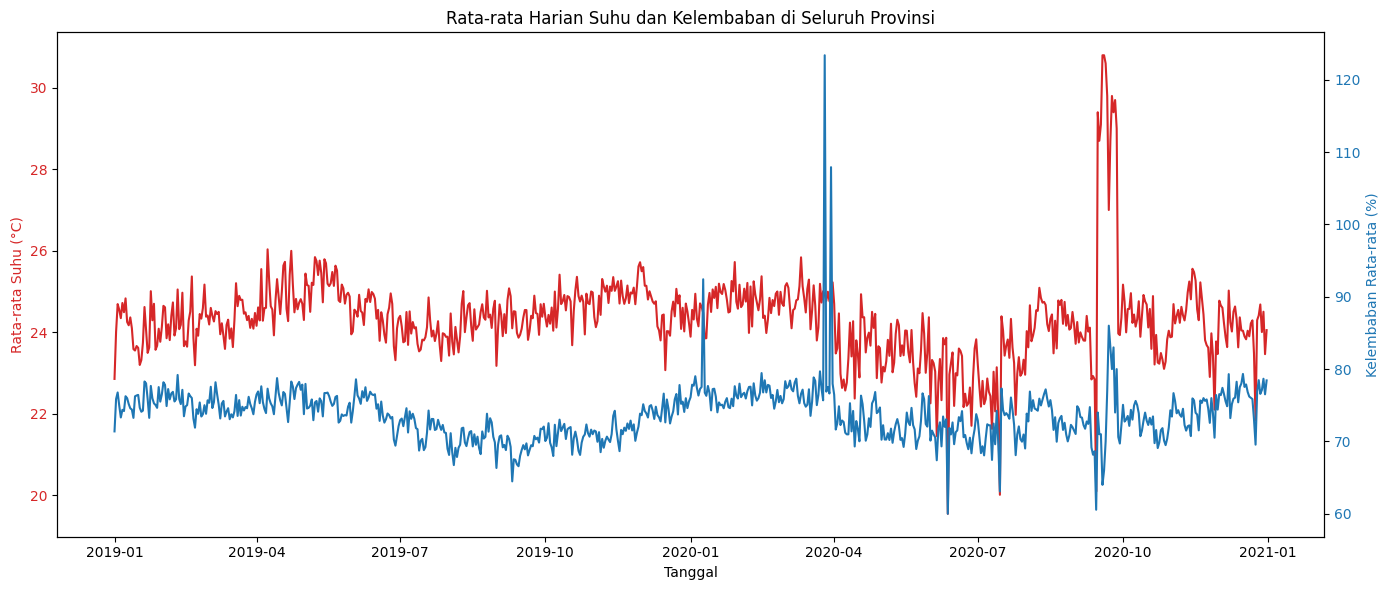

In [82]:
# Time Series Rata-rata Suhu (Tavg) dan Kelembaban (RH_avg)

# Agregasi harian rata-rata di seluruh provinsi
df_ts = df_gabungan.groupby('date')[['Tavg', 'RH_avg']].mean().reset_index()

# Plotting dengan twin axes
fig, ax1 = plt.subplots(figsize=(14, 6))

color_temp = 'tab:red'
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Rata-rata Suhu (°C)', color=color_temp)
ax1.plot(df_ts['date'], df_ts['Tavg'], color=color_temp, label='Suhu Rata-rata')
ax1.tick_params(axis='y', labelcolor=color_temp)

ax2 = ax1.twinx()  # Sumbu Y kedua untuk Kelembaban
color_hum = 'tab:blue'
ax2.set_ylabel('Kelembaban Rata-rata (%)', color=color_hum)
ax2.plot(df_ts['date'], df_ts['RH_avg'], color=color_hum, label='Kelembaban Rata-rata')
ax2.tick_params(axis='y', labelcolor=color_hum)

plt.title('Rata-rata Harian Suhu dan Kelembaban di Seluruh Provinsi')
fig.tight_layout()
plt.show()

# plt.savefig('timeseries_tavg_rhavg.png') # Simpan plot jika diperlukan
plt.close()

## 2. Bar Chart Total Kasus DBD per Provinsi (2019 vs 2020)

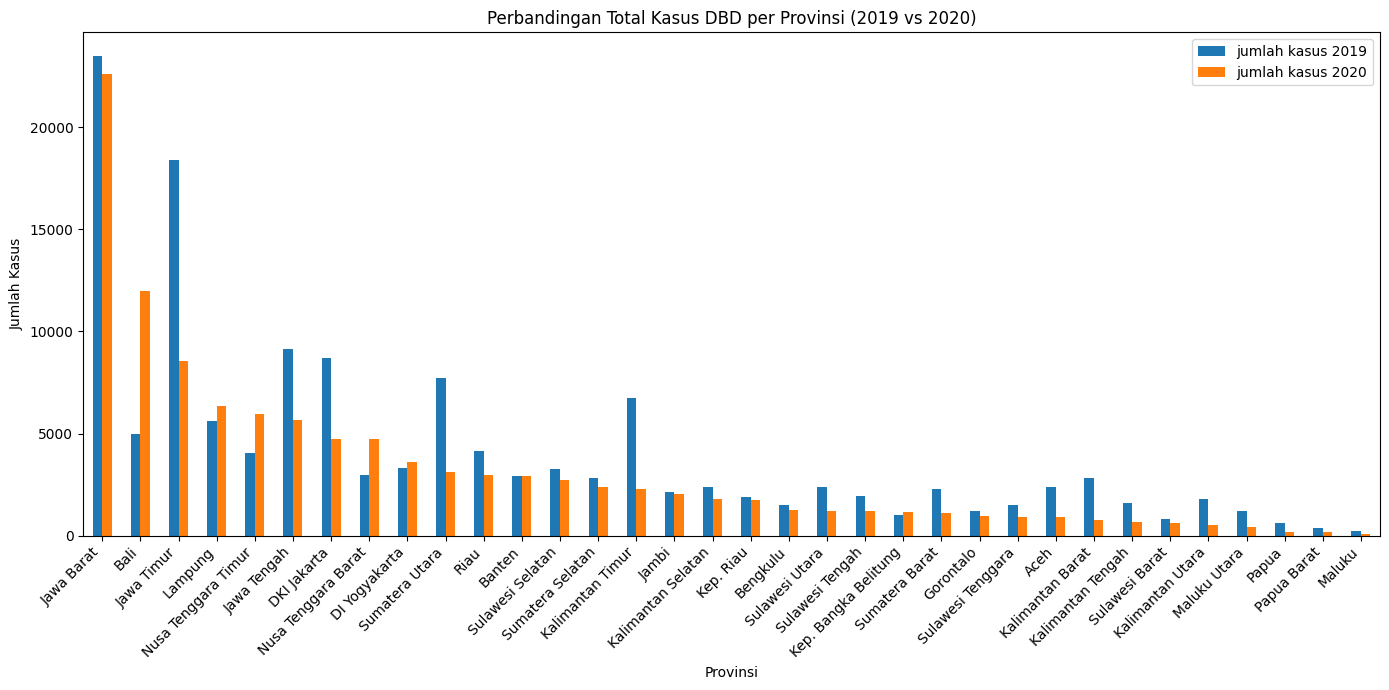

In [83]:
# Bar Chart Total Kasus DBD per Provinsi (2019 vs 2020)

# Agregasi data kasus tahunan per provinsi (menggunakan .mean() karena nilai duplikat per hari)
df_prov_cases = df_gabungan.groupby('provinsi')[[
    'jumlah kasus 2019',
    'jumlah kasus 2020'
]].mean().sort_values(by='jumlah kasus 2020', ascending=False)

# Plotting
df_prov_cases.plot(kind='bar', figsize=(14, 7))
plt.title('Perbandingan Total Kasus DBD per Provinsi (2019 vs 2020)')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Provinsi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# plt.savefig('bar_dbd_cases_province.png') # Simpan plot jika diperlukan
plt.close()

> agregasi untuk korelasi

In [84]:
# Agregasi data iklim dan DBD/Kepadatan per provinsi untuk KEDUA TAHUN
df_corr_all = df_gabungan.groupby(['provinsi', 'tahun']).agg({
    'Tavg': 'mean',  # Rata-rata suhu harian tahunan
    'RR': 'mean',  # Rata-rata curah hujan tahunan
    'incidence rate per 100.000 penduduk 2019': 'mean',  # IR 2019
    'incidence rate per 100.000 penduduk 2020': 'mean'   # IR 2020
}).reset_index()

# Buat kolom 'Incidence_Rate' tunggal berdasarkan tahun
df_corr_all['Incidence_Rate'] = np.where(  #np.where(KONDISI, NILAI_JIKA_TRUE, NILAI_JIKA_FALSE)
    df_corr_all['tahun'] == 2019,  # memilih salah satu tahun sebagai kondisi penentu
    df_corr_all['incidence rate per 100.000 penduduk 2019'],  # TRUE: Ambil data 2019 (_x)
    df_corr_all['incidence rate per 100.000 penduduk 2020']   # FALSE: Ambil data 2020 (_y)
)

df_corr_all

,provinsi,tahun,Tavg,RR,incidence rate per 100.000 penduduk 2019,incidence rate per 100.000 penduduk 2020,Incidence_Rate
0,Aceh,2019,26.926113,5.108136,44.42,0.0,44.42
1,Aceh,2020,26.647188,6.971478,44.42,0.0,0.00
2,Bali,2019,7.971193,3.221399,114.80,273.1,114.80
3,Bali,2020,6.780382,5.141006,114.80,273.1,273.10
4,Banten,2019,27.783279,3.678893,22.55,22.1,22.55
...,...,...,...,...,...,...,...
63,Sumatera Barat,2020,20.442602,11.031039,41.59,20.3,20.30
64,Sumatera Selatan,2019,27.528082,5.860548,33.04,27.5,33.04
65,Sumatera Selatan,2020,27.470538,7.515581,33.04,27.5,27.50
66,Sumatera Utara,2019,25.963750,7.479408,53.09,21.3,53.09


## 3. Scatter Plot Suhu (Tavg) vs Incidence Rate DBD 2019 dan 2020

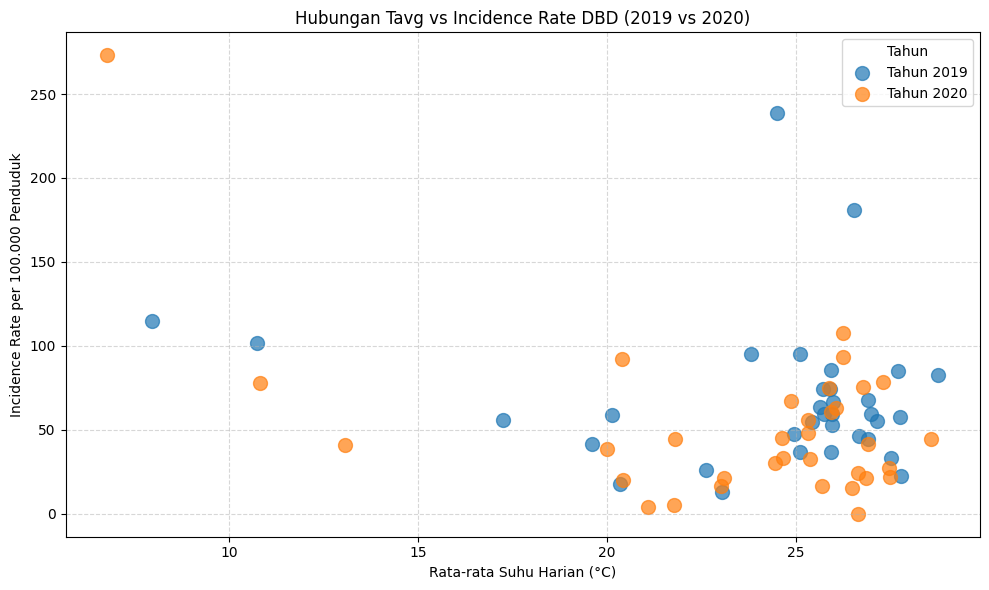

In [85]:
# Scatter Plot Tavg vs Incidence Rate DBD
plt.figure(figsize=(10, 6))

# Loop untuk memplot data 2019 dan 2020 dengan warna berbeda
for year, group in df_corr_all.groupby('tahun'):
    plt.scatter(
        group['Tavg'],
        group['Incidence_Rate'],
        label=f'Tahun {year}',
        alpha=0.7,
        s=100  # Ukuran titik
    )

plt.title('Hubungan Tavg vs Incidence Rate DBD (2019 vs 2020)')
plt.xlabel('Rata-rata Suhu Harian (°C)')
plt.ylabel('Incidence Rate per 100.000 Penduduk')
plt.legend(title='Tahun')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 4. Scatter Plot Curah Hujan (RR) vs Incidence Rate DBD 2019 dan 2020

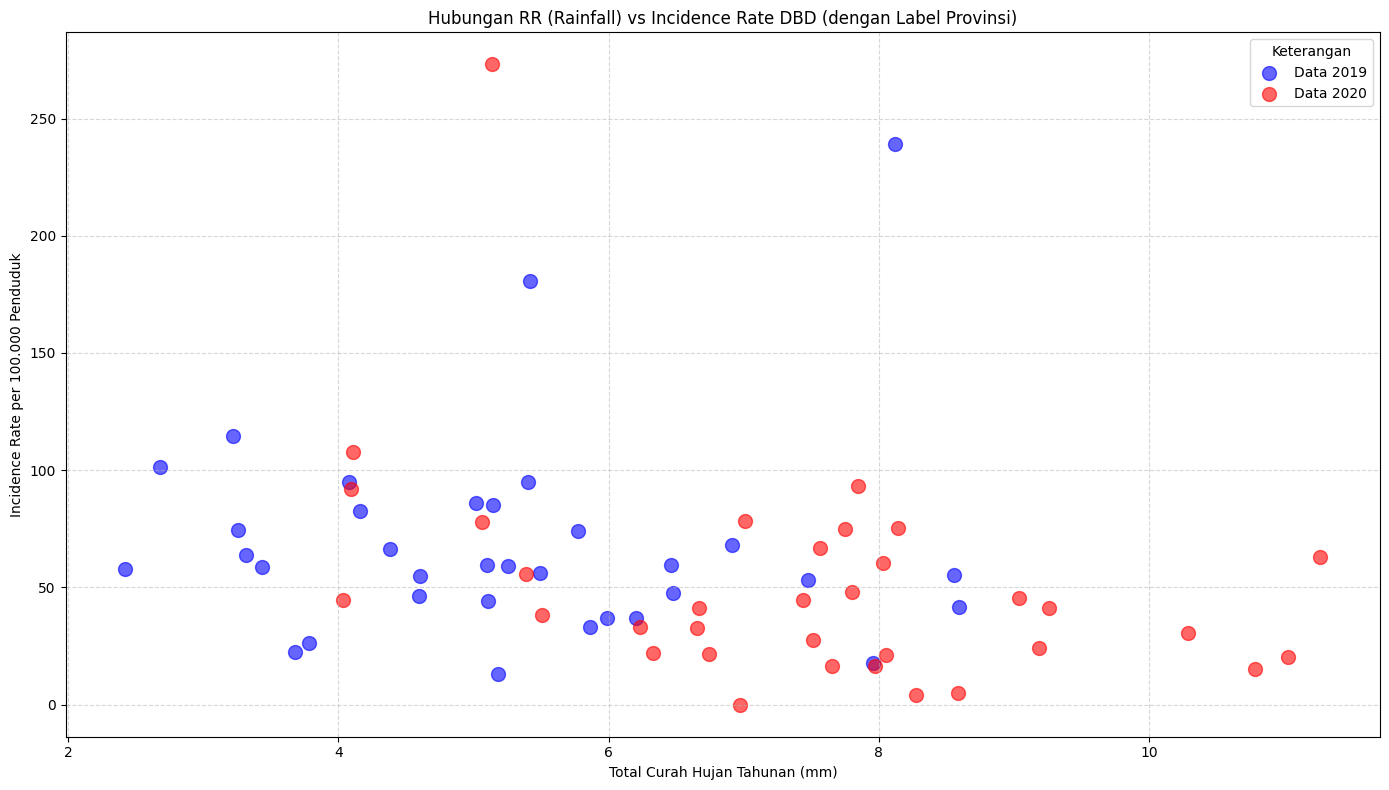

In [86]:
# Scatter Plot Curah Hujan (RR) vs Incidence Rate DBD 2019 dan 2020
plt.figure(figsize=(14, 8)) # Ukuran diperbesar agar label tidak bertumpuk
colors = {2019: 'blue', 2020: 'red'}
line_styles = {2019: '--', 2020: '-'}

# Loop untuk memplot data scatter, garis regresi, dan label untuk setiap tahun
for year, group in df_corr_all.groupby('tahun'):
    # Scatter Plot
    plt.scatter(
        group['RR'],
        group['Incidence_Rate'],
        label=f'Data {year}',
        alpha=0.6,
        s=100,
        color=colors[year]
    )
'''
    # Menambahkan Label Provinsi
    for i in range(len(group)):
        provinsi_name = group.iloc[i]['provinsi']

        # Penyesuaian label agar tidak bertumpuk (optional, tergantung penyebaran data)
        # Contoh: Jika tahun 2019, label diletakkan sedikit di kiri titik.
        x_offset = -0.015 * max(group['RR']) if year == 2019 else 0.005 * max(group['RR'])
        y_offset = 2

        plt.text(
            group.iloc[i]['RR'] + x_offset,
            group.iloc[i]['Incidence_Rate'] + y_offset,
            provinsi_name,
            fontsize=8,
            alpha=0.8,
            ha='center',
            color=colors[year]
        )
'''
'''
    # --- Menghitung dan Memplot Garis Regresi ---
    X = group['RR']
    Y = group['Incidence_Rate']

    z = np.polyfit(X, Y, 1)
    p = np.poly1d(z)

    plt.plot(
        X,
        p(X),
        color=colors[year],
        linestyle=line_styles[year],
        label=f'Tren {year} ($y={z[0]:.2f}x+{z[1]:.2f}$)'
    )
'''
plt.title('Hubungan RR (Rainfall) vs Incidence Rate DBD (dengan Label Provinsi)')
plt.xlabel('Total Curah Hujan Tahunan (mm)')
plt.ylabel('Incidence Rate per 100.000 Penduduk')
plt.legend(title='Keterangan')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# plt.savefig('scatter_rr_vs_incidence_2019.png') # Simpan plot jika diperlukan
plt.close()

## 5. Heatmap Matriks Korelasi Tahun 2019

In [87]:
# Agregasi data iklim (Tavg, RH_avg, RR) dan data DBD/Kepadatan (Incidence Rate, Kepadatan) per provinsi untuk tahun 2019
df_corr_2019 = df_gabungan[df_gabungan['tahun'] == 2019].groupby('provinsi').agg({
    'Tavg': 'mean',  # Rata-rata suhu harian tahunan pada tahun 2019
    'RH_avg': 'mean',  # Rata-rata kelembaban harian tahunan pada tahun 2019
    'RR': 'sum',     # Total curah hujan tahunan pada tahun 2019
    'incidence rate per 100.000 penduduk 2019': 'mean',
    'kepadatan 2019': 'mean'
}).reset_index()

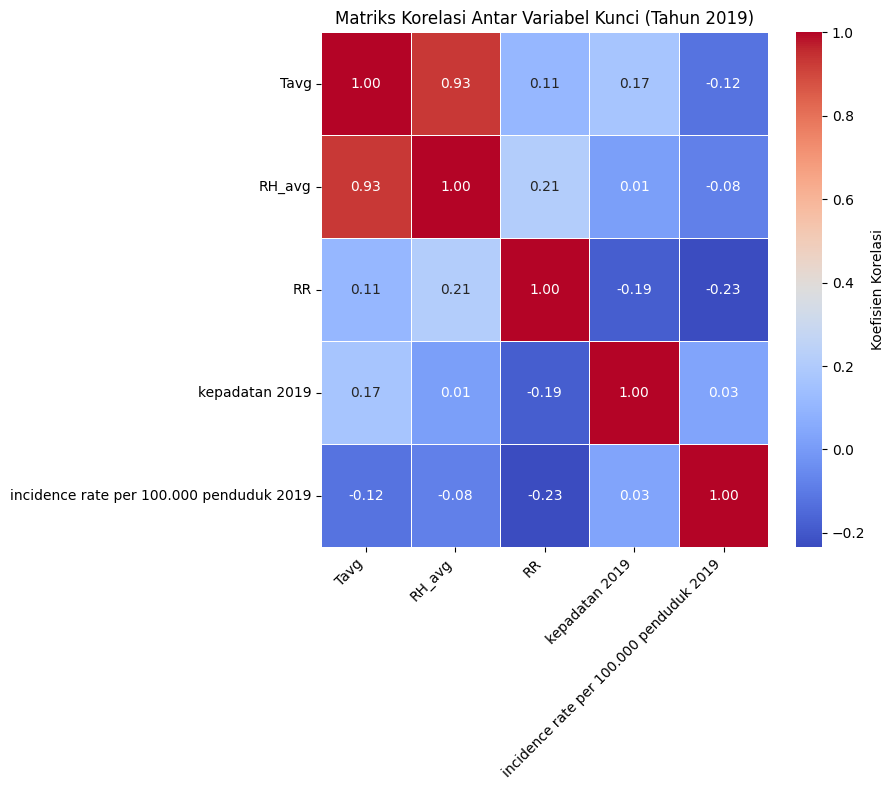

In [88]:
# Asumsi: df_corr_2019 sudah diagregasi per provinsi untuk tahun 2019

# Kolom yang akan dikorelasikan
corr_cols = [
    'Tavg',
    'RH_avg',
    'RR',
    'kepadatan 2019',
    'incidence rate per 100.000 penduduk 2019' # Gunakan kolom Incidence Rate 2019
]

# Hitung Matriks Korelasi (Pearson)
# Pastikan semua kolom yang digunakan adalah tipe data numerik
df_corr_matrix = df_corr_2019[corr_cols].corr()

# Plot Heatmap
plt.figure(figsize=(9, 8))
sns.heatmap(
    df_corr_matrix,
    annot=True,        # Tampilkan nilai koefisien korelasi
    cmap='coolwarm',   # Skema warna yang baik untuk menunjukkan korelasi positif/negatif
    fmt=".2f",         # Format angka hingga 2 desimal
    linewidths=.5,     # Garis pemisah antar sel
    cbar_kws={'label': 'Koefisien Korelasi'}
)

# Sesuaikan label agar lebih ringkas di plot
plt.title('Matriks Korelasi Antar Variabel Kunci (Tahun 2019)')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Heatmap Antar Variabel Iklim vs Jumlah Kasus DBD (Heatmap)

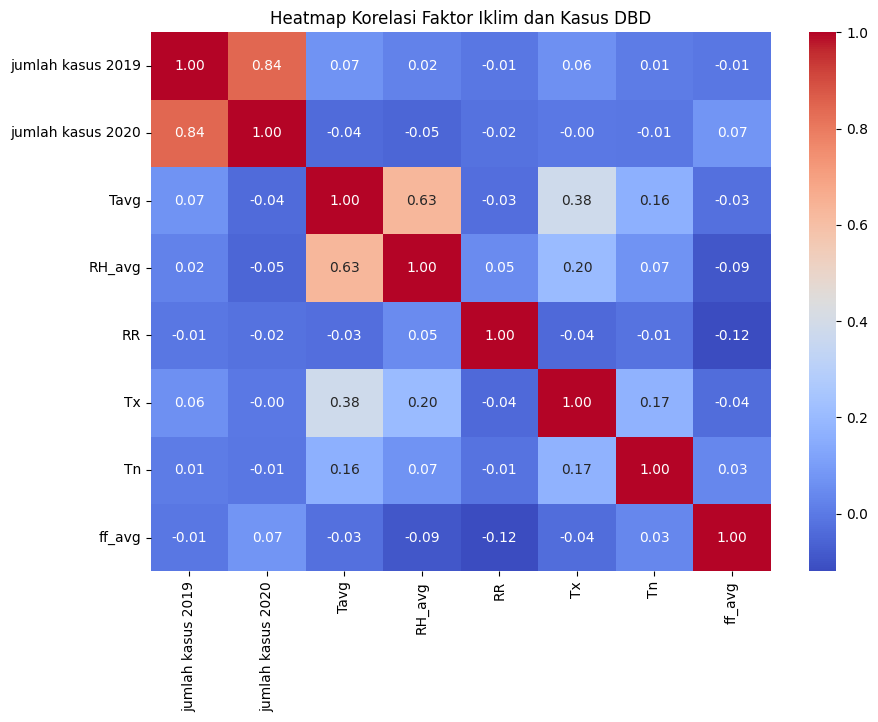

In [89]:
import seaborn as sns

cols_corr = ["jumlah kasus 2019", "jumlah kasus 2020", "Tavg", "RH_avg", "RR", "Tx", "Tn", "ff_avg"]
corr = df_gabungan[cols_corr].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Faktor Iklim dan Kasus DBD")
plt.show()

## Boxplot Faktor Iklim

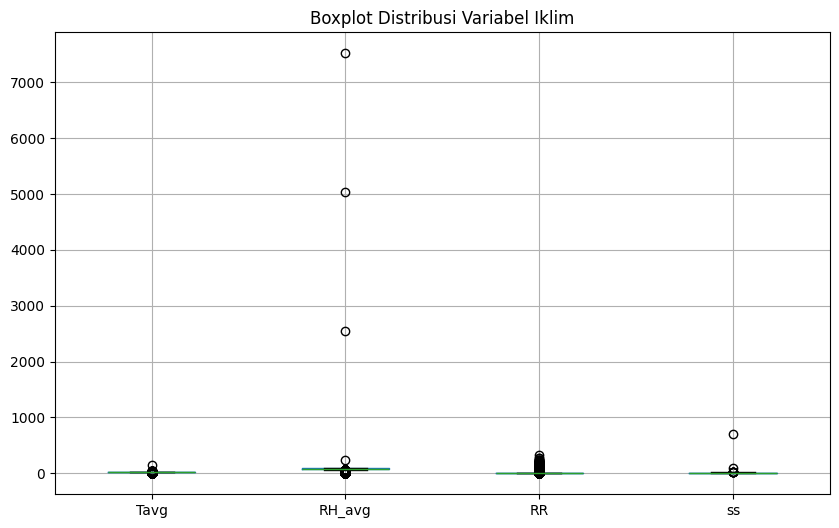

In [90]:
plt.figure(figsize=(10,6))
df_gabungan[["Tavg", "RH_avg", "RR", "ss"]].boxplot()
plt.title("Boxplot Distribusi Variabel Iklim")
plt.show()

## Scatter Plot (perbandingan) Kepadatan Penduduk vs Incidence Rate per 100.000 penduduk

> 2019

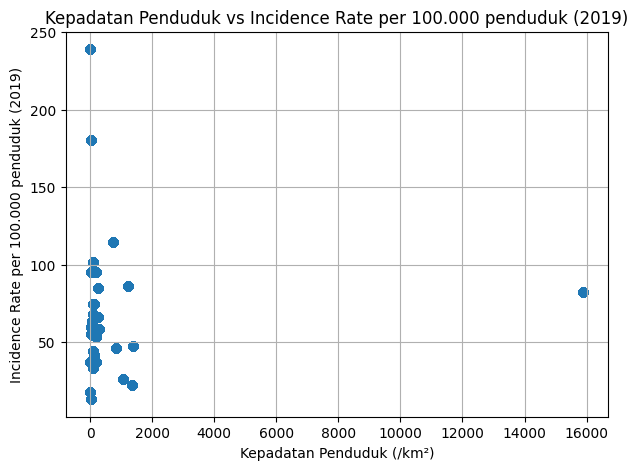

In [91]:
plt.figure(figsize=(7,5))
plt.scatter(df_gabungan["kepadatan 2019"], df_gabungan["incidence rate per 100.000 penduduk 2019"], alpha=0.5)
plt.title("Kepadatan Penduduk vs Incidence Rate per 100.000 penduduk (2019)")
plt.xlabel("Kepadatan Penduduk (/km²)")
plt.ylabel("Incidence Rate per 100.000 penduduk (2019)")
plt.grid()
plt.show()

> 2020

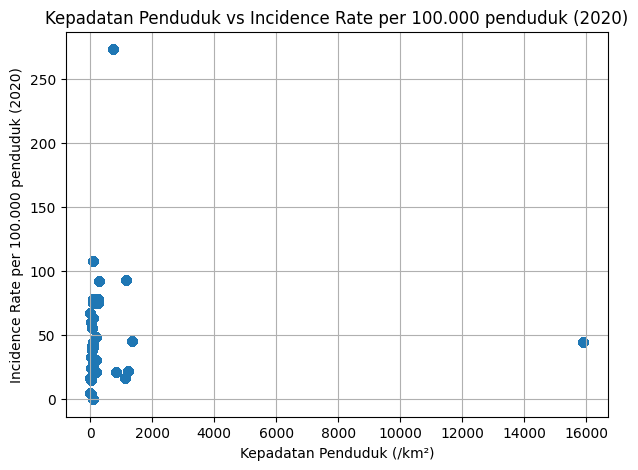

In [92]:
plt.figure(figsize=(7,5))
plt.scatter(df_gabungan["kepadatan 2020"], df_gabungan["incidence rate per 100.000 penduduk 2020"], alpha=0.5)
plt.title("Kepadatan Penduduk vs Incidence Rate per 100.000 penduduk (2020)")
plt.xlabel("Kepadatan Penduduk (/km²)")
plt.ylabel("Incidence Rate per 100.000 penduduk (2020)")
plt.grid()
plt.show()

## Grafik Tren Musiman Kasus DBD per Bulan

> 2019

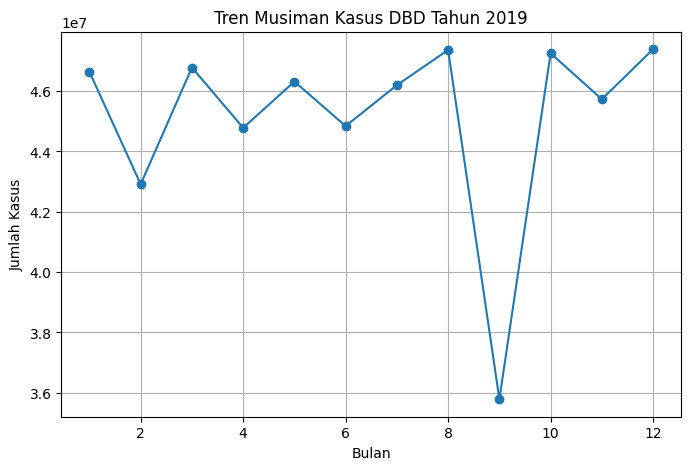

In [93]:
df_gabungan["bulan"] = df_gabungan["date"].dt.month

df_musim = df_gabungan.groupby("bulan")["jumlah kasus 2019"].sum()

plt.figure(figsize=(8,5))
df_musim.plot(marker='o')
plt.title("Tren Musiman Kasus DBD Tahun 2019")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Kasus")
plt.grid()
plt.show()

> 2020

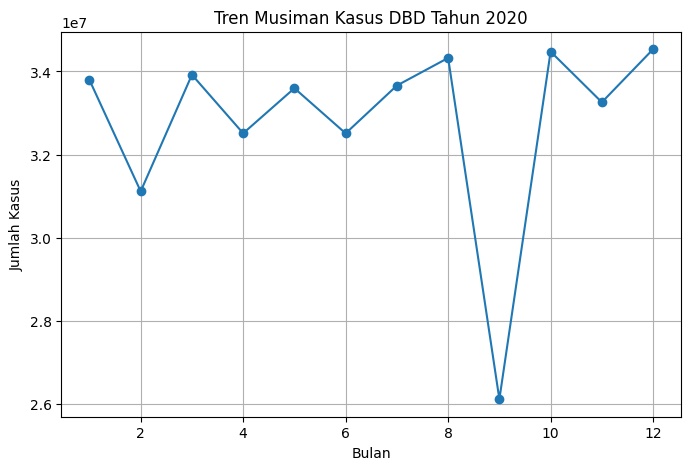

In [94]:
df_gabungan["bulan"] = df_gabungan["date"].dt.month

df_musim = df_gabungan.groupby("bulan")["jumlah kasus 2020"].sum()

plt.figure(figsize=(8,5))
df_musim.plot(marker='o')
plt.title("Tren Musiman Kasus DBD Tahun 2020")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Kasus")
plt.grid()
plt.show()

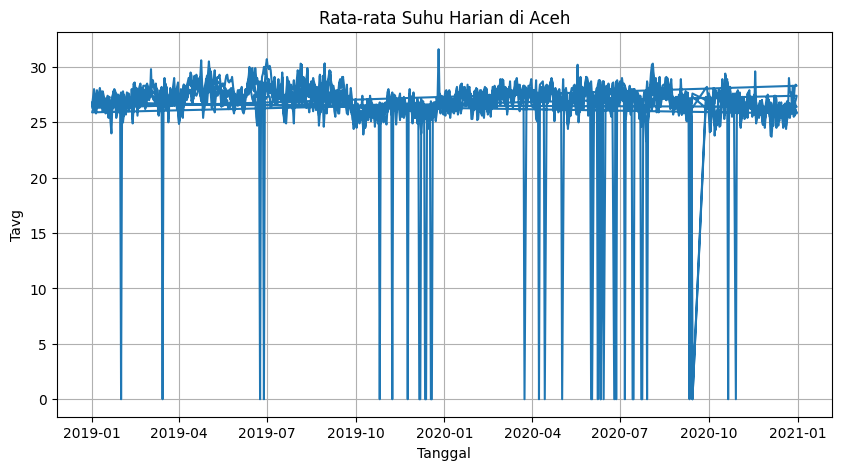

In [95]:
prov = "Aceh"

df_plot = df_gabungan[df_gabungan["provinsi"] == prov]

plt.figure(figsize=(10,5))
plt.plot(df_plot["date"], df_plot["Tavg"])
plt.title(f"Rata-rata Suhu Harian di {prov}")
plt.xlabel("Tanggal")
plt.ylabel("Tavg")
plt.grid()
plt.show()

# **DATA PUBLISHING**

Github:

[9_Laili Nurrohmatul Fadhila Zulfa_Siti Fadilah Nurkhotimah](https://github.com/SitiFadilahNurkhotimah/Kelompok_9_2024C_PROJEK_AKHIR_DATA_WRANGLING )